<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Ago25-26/GradienteDescendente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   En otro cuaderno implementar el método del gradiente descendiente y aplicarlo a los datos de los 100 metros.
2.   Extra: Aplicar todo lo visto en clase al conjunto de datos que elegiste en una tarea anterior



# **Metodo del Gradiente Descendente**

Buscamos minimizar la funcion costo como funcion de $w$:


$$L=\frac{1}{2N} \sum_i(f(x_i;w)-t_i)^2=\frac{1}{2N}w^TX^TXw-2w^TX^Tt+t^Tt$$

Para encontrar los pesos necesitamos calcular:

\begin{eqnarray}   
w_0=w_{0,0}-α\frac{∂L}{∂w_0} \\
w_1=w_{1,0}-α\frac{∂L}{∂w_0} \\
w_n=w_{n,0}-α\frac{∂L}{∂w_0}
\end{eqnarray}

Buscamos primero el gradiente de la funcion costo:

$$\frac{∂L}{∂w}=\frac{1}{N}X^TXw-\frac{1}{N}X^Tt$$


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Importamos nuestro dataset desde Drive
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Data/olympic100m_men.txt"

data=np.loadtxt(file,delimiter=",").T

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Creamos la funcion para el metodo Gradiente Descendente
def gradient_descent(x, y, iterations, learning_rate, tolerance, degree=1):

  datax = [x**(i) for i in range(degree+1)]
  # Definimos X y w
  X = np.vstack(datax).T
  w = np.random.uniform(-10.0, 10.0, size=degree+1)

  # Calculamos el gradiente de la funcion costo
  for i in range (iterations):

    gradient = 1/(len(x))*(X.T @ X @ w)-1/(len(x))*X.T @ y

    if np.all(np.abs(learning_rate*gradient) < tolerance):

      print(f'Converge en {i} iteraciones')
      break
    # Actualizamos los pesos w
    w = w-learning_rate*gradient

  return w

In [23]:
# Realizamos una prueba del metodo

x = data[0]
x_norm = (x-1896)/4
x_aux = np.linspace(np.min(x_norm), np.max(x_norm), 2500)
y = data[1]

w = gradient_descent(x_norm, y, 100000, 0.0005, 1e-5, 1)

w

Converge en 23761 iteraciones


array([11.069055 , -0.0496306])

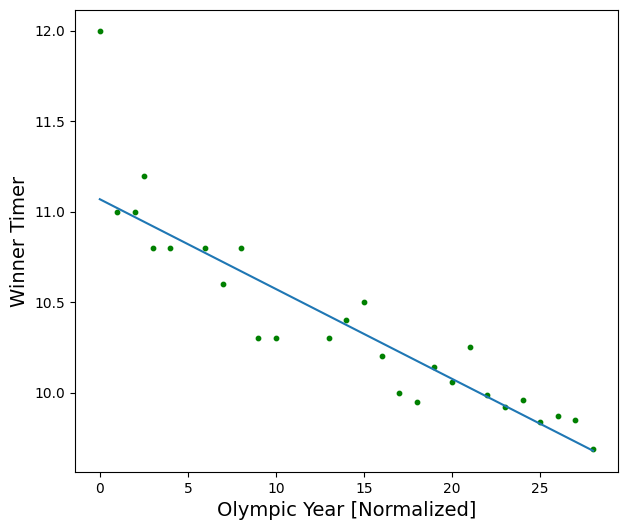

In [26]:
# Graficamos el ajuste
def poly(x, weights):
  y_p = 0
  for i in range(len(weights)):
    y_p += weights[i]*x**(i)

  return y_p

ig = plt.figure(figsize=(7,6))
plt.scatter(x_norm, y, s=10, color='Green')
degree = 8

plt.plot(x_aux, poly(x_aux, w))

plt.xlabel('Olympic Year [Normalized]', fontsize=14)
plt.ylabel('Winner Timer', fontsize=14);
